In [2]:
import numpy as np
import matplotlib.pyplot as plt
from test_cases import *
import sklearn
import sklearn.datasets

from utils import plot_decision_boundary, sigmoid, load_dataset, load_extra_datasets

%matplotlib inline

In [3]:
np.random.seed(14)

In [15]:
# Get the flower dataset
X, y = load_dataset()

print(X.shape,y.shape)


(2, 400) (1, 400)


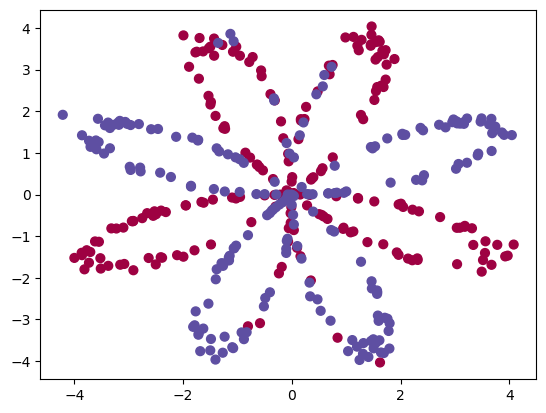

In [16]:
plt.scatter(X[0, :], X[1, :], c=y, s=40, cmap=plt.cm.Spectral);

In [5]:
# 2 layer neural network
def compute_layer_size_from_data(x_, y_):
    n_0 = x_.shape[0]
    n_2 = y_.shape[0]
    
    return n_0, n_2


In [6]:
sample_n_0, sample_n_1 = compute_layer_size_from_data(X,y)
print(sample_n_0, sample_n_1)

2 1


In [13]:
def initialize_parameters(n_0, n_1, n_2):
    w1 = np.random.randn(n_1, n_0) * 0.01
    b1 = np.zeros((n_1,1))
    
    w2 = np.random.randn(n_2, n_1) * 0.01
    b2 = np.zeros((n_2,1))
    
    assert(w1.shape == (n_1, n_0))
    assert(b1.shape == (n_1, 1))
    assert(w2.shape == (n_2, n_1))
    assert(b2.shape == (n_2, 1))
    
    return {
        "w1": w1,
        "b1": b1,
        "w2": w2,
        "b2": b2
    }

In [14]:
sample_params = initialize_parameters(sample_n_0, 4, sample_n_1)
print(sample_params)

{'w1': array([[ 0.01152599, -0.00224236],
       [-0.00326061, -0.00030911],
       [ 0.00355717,  0.00849587],
       [-0.00122154, -0.00680852]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.]]), 'w2': array([[-0.01067877, -0.00076679,  0.00572963,  0.00457947]]), 'b2': array([[0.]])}


In [27]:
def forward_propogation(x_, params):
    w1 = params["w1"]
    b1 = params["b1"]
    
    w2 = params["w2"]
    b2 = params["b2"]
    
    # compute forward pass values in order
    z1 = np.dot(w1, x_) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = 1 / (1 + np.exp(-z2))
    
    forward_params_cache = {
        "z1": z1,
        "a1": a1,
        "z2": z2,
        "a2": a2
    }
    assert(a2.shape == (1, x_.shape[1]))
    return a2, forward_params_cache


In [31]:
sample_a2, sample_forward_params = forward_propogation(X, sample_params)
print(sample_a2.shape)
print(np.mean(sample_forward_params["a2"]), np.mean(sample_forward_params["z2"]), 
                                                   np.mean(sample_forward_params["a1"]), 
                                                           np.mean(sample_forward_params["z1"]))

(1, 400)
0.5000018596487178 7.438594959662014e-06 -0.00012964123861792693 -0.0001296898827466104


In [25]:
def backward_propogation(params, forward_params_cache, x_, y_):
    a1 = forward_params_cache["a1"]
    z1 = forward_params_cache["z1"]
    a2 = forward_params_cache["a2"]
    z2 = forward_params_cache["z2"]
    
    w1 = params["w1"]
    b1 = params["b1"]
    w2 = params["w2"]
    b2 = params["b2"]
    
    m = x_.shape[1]
    dz2 = np.subtract(a2, y_)
    dw2 = (1/m) * np.dot(dz2, a1.T)
    dz1 = np.dot(w2.T, dz2) * (1 - np.power(a1, 2))
    dw1 = (1/m) * np.dot(dz1, x_.T)
    
    db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True)
    db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)
    
    return {
        "dw1": dw1,
        "dw2": dw2,
        "db1": db1,
        "db2": db2
    }


In [36]:
sample_gradient_params = backward_propogation(sample_params, sample_forward_params, X, y)
print(sample_gradient_params)

{'dw1': array([[ 2.42193376e-04, -2.10539712e-03],
       [ 1.73739312e-05, -1.51081068e-04],
       [-1.29411704e-04,  1.12736702e-03],
       [-1.03693595e-04,  9.01443413e-04]]), 'dw2': array([[-7.03174299e-04,  1.29898259e-05,  1.59257860e-03,
        -1.31332609e-03]]), 'db1': array([[-1.77761220e-07],
       [-1.85653146e-09],
       [ 8.76687111e-09],
       [ 1.53441035e-08]]), 'db2': array([[1.85964872e-06]])}


In [32]:
def cost_function(a2, y_):
    log_prob = (y_ * np.log(a2)) + ((1-y_) * np.log(1-a2))
    total_cost = -np.mean(log_prob)
    total_cost = np.squeeze(total_cost)   # turns [[a]] type value to a
    
    assert(isinstance(total_cost, float)) # makes sure that the value is float
    
    return total_cost


In [33]:
print(cost_function(sample_a2, y))

0.6931577839678628


In [34]:
def update_parameters(params, gradients, learning_rate):
    w1 = params["w1"]
    b1 = params["b1"]
    w2 = params["w2"]
    b2 = params["b2"]
    
    dw1 = gradients["dw1"]
    db1 = gradients["db1"]
    dw2 = gradients["dw2"]
    db2 = gradients["db2"]
    
    # update rule
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    
    # return updated parameters
    return {
        "w1": w1,
        "w2": w2,
        "b1": b1,
        "b2": b2
    }

In [39]:
sample_updated_params = update_parameters(sample_params, sample_gradient_params, 1.2)
print(sample_updated_params)

{'w1': array([[ 0.01123536,  0.00028412],
       [-0.00328146, -0.00012782],
       [ 0.00371247,  0.00714303],
       [-0.00109711, -0.00789025]]), 'w2': array([[-0.00983496, -0.00078238,  0.00381853,  0.00615546]]), 'b1': array([[ 2.13313464e-07],
       [ 2.22783775e-09],
       [-1.05202453e-08],
       [-1.84129242e-08]]), 'b2': array([[-2.23157846e-06]])}


In [78]:
def model(x_, y_, n_1, n_iterations, print_cost = False):
    n_0, n_2 = compute_layer_size_from_data(X, y)
    
    # initialize parameters
    params = initialize_parameters(n_0, n_1, n_2)
    W1 = params["w1"]
    B1 = params["b1"]
    W2 = params["w2"]
    B2 = params["b2"]
    
    for i in range(n_iterations):
        A2, forward_params_cache = forward_propogation(X, params)
        gradient_of_params = backward_propogation(params, forward_params_cache, X, y)
        
        params = update_parameters(params, gradient_of_params, 1.2)
        
        if print_cost and i % 1000 == 0:
            print(f"Cost at iteration {i} is {cost_function(A2, y)}")
    
    return params
    

In [79]:
sample_trained_params = model(X, y, 4, 10000, print_cost=True)
print(sample_trained_params)

Cost at iteration 0 is 0.6931272598551422
Cost at iteration 1000 is 0.2814369402706421
Cost at iteration 2000 is 0.2690136969682534
Cost at iteration 3000 is 0.2620099152640904
Cost at iteration 4000 is 0.2574391879430015
Cost at iteration 5000 is 0.254283477474364
Cost at iteration 6000 is 0.25200100240639
Cost at iteration 7000 is 0.2502858401302231
Cost at iteration 8000 is 0.24895621879423976
Cost at iteration 9000 is 0.24789849578095308
{'w1': array([[ 10.8343315 ,  12.64507291],
       [  0.60350723,   2.10893382],
       [-10.99534957,  13.70833207],
       [  0.04493764,   8.24196753]]), 'w2': array([[-6.37323515, -0.67663153, -6.24156852, 11.18343599]]), 'b1': array([[ 0.11712807],
       [ 4.09610706],
       [-0.09754586],
       [ 0.04734304]]), 'b2': array([[0.31321883]])}


In [44]:
def predict(params, x_):
    A2, forward_prop_params = forward_propogation(x_, params)
    predictions = np.where(A2 >= 0.5, 1, np.where(A2 < 0.5, 0, A2))
    
    return predictions

In [45]:
sample_predictions = predict(sample_trained_params, X)
print(sample_predictions)

[[0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0.
  1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

In [47]:
print ('Accuracy: %d' % float((np.dot(y,sample_predictions.T) + np.dot(1-y,1-sample_predictions.T))
                              /float(y.size)*100) + '%')

Accuracy: 91%


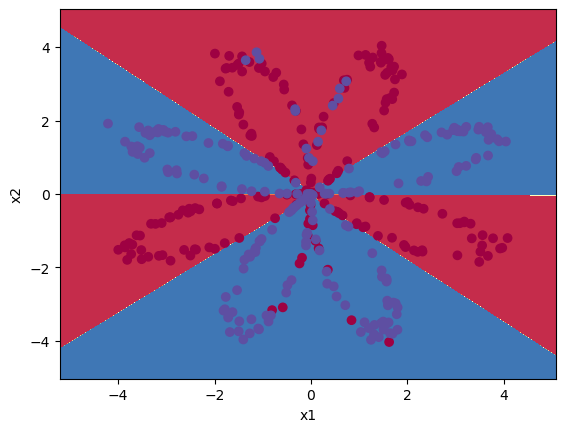

In [49]:
plot_decision_boundary(lambda x: predict(sample_trained_params, x.T), X, y)

In [50]:
hidden_layer_size = [1, 2, 4, 5, 10, 20, 40]

def cross_validation_layer_size(h_l_size, x_, y_):
    plt.figure(figsize=(16, 32))
    for i, n_h in enumerate(h_l_size):
        plt.subplot(5, 2, i+1)
        plt.title(f"hidden layer of size: {n_h}")
        params = model(x_, y_, n_h, 4000)
        plot_decision_boundary(lambda x: predict(params, x.T), x_, y_)
        predictions = predict(params, x_)
        accuracy = float((np.dot(y_,predictions.T) + np.dot(1-y_,1-predictions.T))
                              /float(y_.size)*100)
        print(f"Accuracy for the {n_h} layer predictions is: {accuracy} %")
        

Accuracy for the 1 layer predictions is: 67.25 %
Accuracy for the 2 layer predictions is: 67.0 %
Accuracy for the 4 layer predictions is: 90.25 %
Accuracy for the 5 layer predictions is: 91.0 %
Accuracy for the 10 layer predictions is: 90.75 %
Accuracy for the 20 layer predictions is: 90.75 %
Accuracy for the 40 layer predictions is: 91.25 %


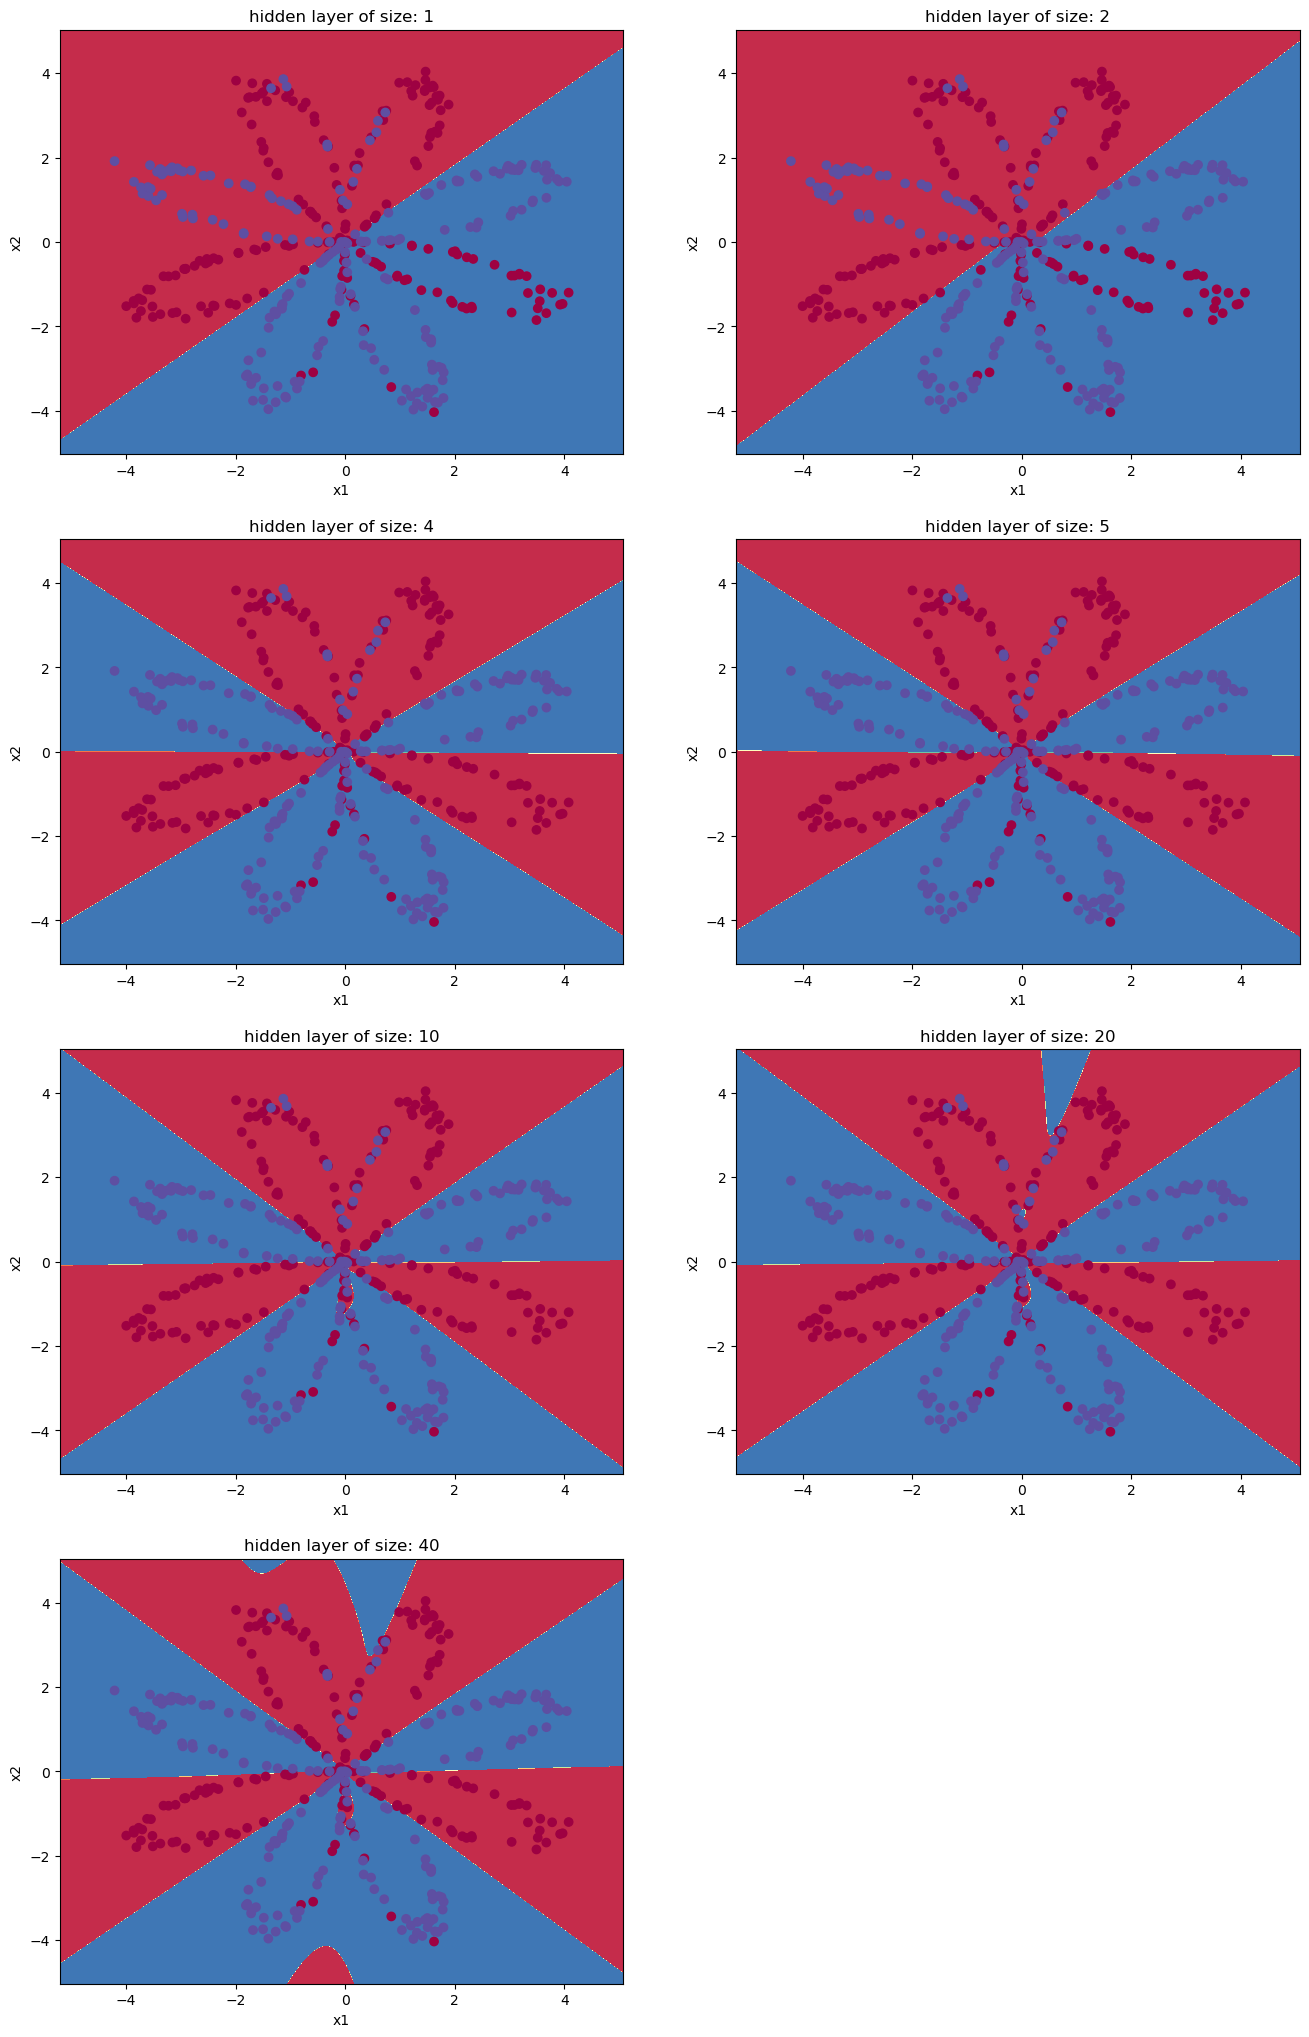

In [51]:
cross_validation_layer_size(hidden_layer_size, X, y)

In [52]:
# model of size 5 is a good enough accuracy measure fot the model
